### 1. SeriousDlqin2yrs: Person experienced 90 days past due delinquency or worse 	(Y/N)

### 2. RevolvingUtilizationOfUnsecuredLines	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits	(percentage)

### 3. age:	Age of borrower in years (integer)

### 4. NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years. (integer)

### 5. DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income (percentage)

### 6. MonthlyIncome: Monthly income (real)

### 7. NumberOfOpenCreditLinesAndLoans:	Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (integer)

### 8. NumberOfTimes90DaysLate:	Number of times borrower has been 90 days or more past due.	(integer)

### 9. NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit	(integer)

### 10. NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	(integer)

### 11. NumberOfDependents:	Number of dependents in family excluding themselves (spouse, children etc.)	(integer)

In [804]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [805]:
default=pd.read_csv('/Users/ankitshastri/Downloads/cs-training.csv')

In [806]:
default.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [807]:
l=[]
for a in default.columns:
    l.append(a)

print(l)


['Unnamed: 0', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [808]:
default['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [809]:
default.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [810]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [811]:
default=default.drop(['Unnamed: 0'],axis=1)

In [812]:
default.duplicated().sum()

609

In [813]:
default=default.drop_duplicates()

In [814]:
default.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

<Axes: ylabel='MonthlyIncome'>

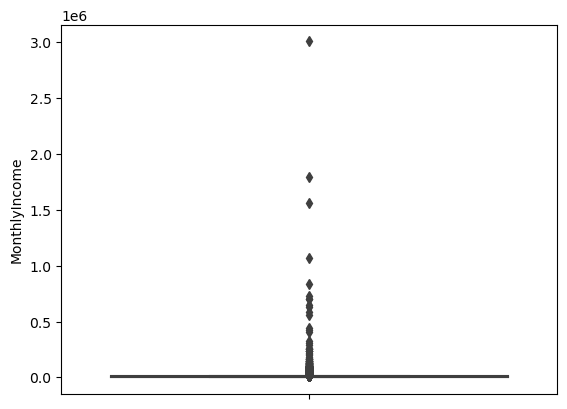

In [815]:
sns.boxplot(y=default['MonthlyIncome'])

In [816]:
i=default[default['MonthlyIncome'].isnull() & default['NumberOfDependents'].isnull()].index

In [817]:
df = default.drop(index=i)

In [818]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25393
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

<Axes: ylabel='MonthlyIncome'>

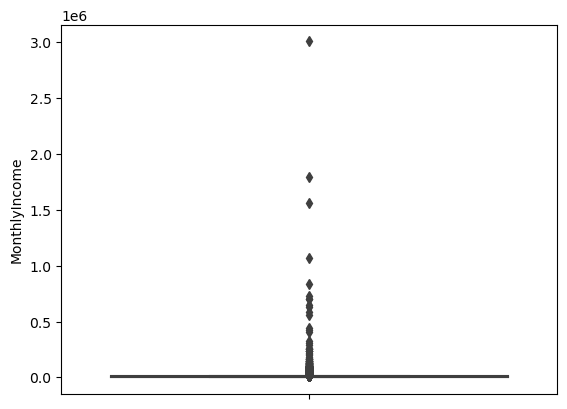

In [819]:
sns.boxplot(y=default['MonthlyIncome'])

In [820]:
df['MonthlyIncome'].describe()

count    1.201700e+05
mean     6.675098e+03
std      1.438958e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [821]:
df['MonthlyIncome'].quantile(0.5)

5400.0

In [822]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())


In [823]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [824]:
df[df['NumberOfOpenCreditLinesAndLoans']==0]['SeriousDlqin2yrs'].value_counts()

0    1139
1     448
Name: SeriousDlqin2yrs, dtype: int64

<Axes: ylabel='age'>

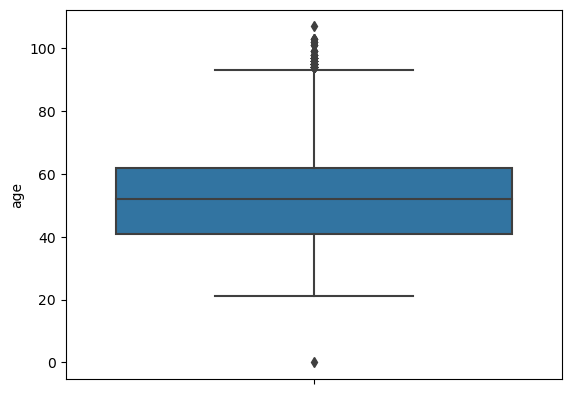

In [825]:
sns.boxplot(y=df['age'])

In [826]:
i=df[df['age']==0].index

In [827]:
df=df.drop(index=i)

<Axes: ylabel='age'>

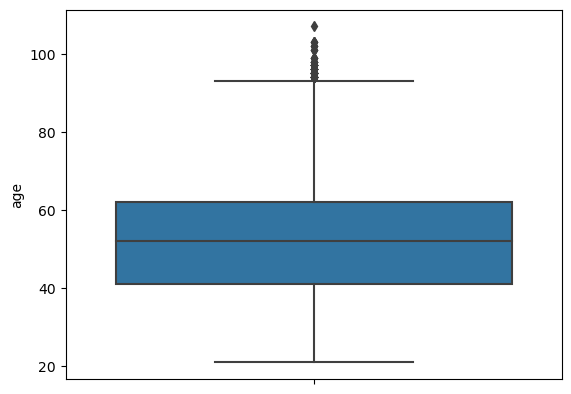

In [828]:
sns.boxplot(y=df['age'])

In [829]:
df['age'].describe()

count    145562.000000
mean         52.111059
std          14.567062
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         107.000000
Name: age, dtype: float64

In [830]:
df['age'].quantile(0.99)

86.0

In [831]:
df[df['age']>df['age'].quantile(0.99)]['SeriousDlqin2yrs'].value_counts()

0    1327
1      36
Name: SeriousDlqin2yrs, dtype: int64

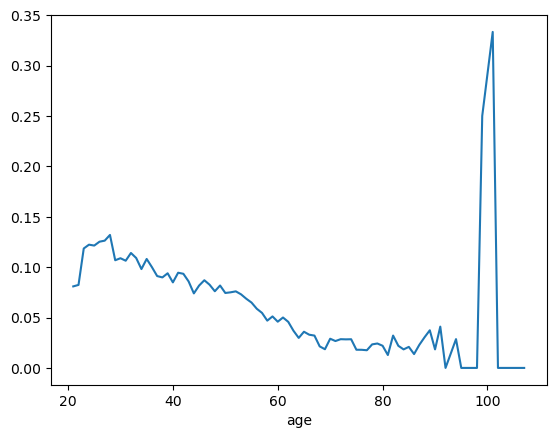

In [832]:
df.groupby('age')['SeriousDlqin2yrs'].mean().plot();

In [833]:
df[df['age']>df['age'].quantile(0.99)][['SeriousDlqin2yrs','MonthlyIncome','DebtRatio']].describe()

,SeriousDlqin2yrs,MonthlyIncome,DebtRatio
count,1363.000000,1363.000000,1363.000000
mean,0.026412,5258.922230,154.720648
std,0.160417,6582.190737,1809.917427
min,0.000000,0.000000,0.000000
25%,0.000000,3474.000000,0.003017
50%,0.000000,5400.000000,0.077028
75%,0.000000,5400.000000,2.261443
max,1.000000,203500.000000,61106.500000


In [834]:
i=df[df['age']>df['age'].quantile(0.99)].index

In [835]:
df=df.drop(index=i)

In [836]:
df['age'].describe()

count    144199.000000
mean         51.756371
std          14.166937
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          86.000000
Name: age, dtype: float64

In [837]:
df.RevolvingUtilizationOfUnsecuredLines.describe()


count    144199.000000
mean          5.988423
std         251.673520
min           0.000000
25%           0.032069
50%           0.162095
75%           0.565676
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<Axes: >

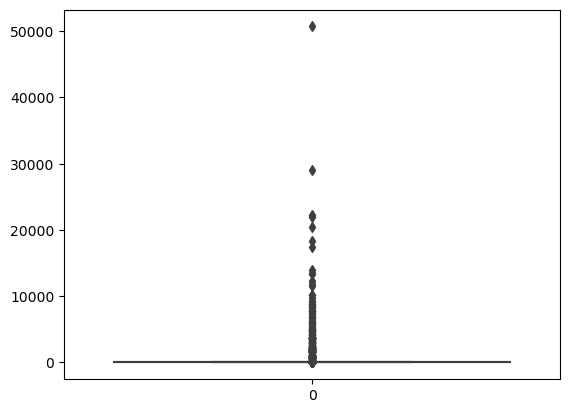

In [838]:
sns.boxplot(df['RevolvingUtilizationOfUnsecuredLines'])

In [839]:
df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)

1.0951845640999989

In [840]:
df[df['RevolvingUtilizationOfUnsecuredLines']>100]['SeriousDlqin2yrs'].value_counts()

0    200
1     11
Name: SeriousDlqin2yrs, dtype: int64

In [841]:
one_less=df[df['RevolvingUtilizationOfUnsecuredLines']<100]['SeriousDlqin2yrs'].mean()
one_more=df[df['RevolvingUtilizationOfUnsecuredLines']>100]['SeriousDlqin2yrs'].mean()

print('probability of default for utilization less than 10: ',one_less)
print('probability of default for utilization less than 10: ',one_more)

probability of default for utilization less than 10:  0.06795010695335722
probability of default for utilization less than 10:  0.052132701421800945


<Axes: >

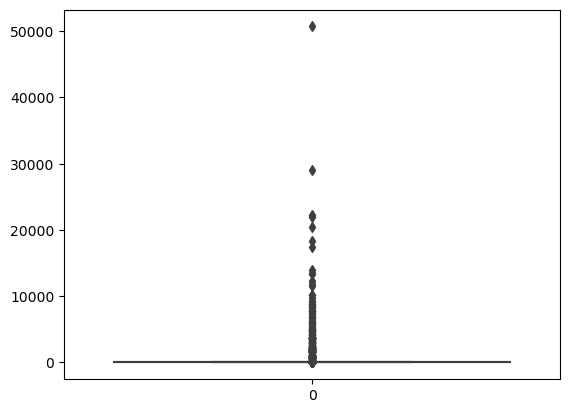

In [842]:
sns.boxplot(df['RevolvingUtilizationOfUnsecuredLines'])

In [843]:
df.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()


NumberOfTime30-59DaysPastDueNotWorse
0     120760
1      15666
2       4525
3       1734
4        733
5        338
6        138
7         53
8         25
9         11
10         4
11         1
12         2
13         1
96         5
98       203
dtype: int64

In [844]:
df.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     136800
1       5615
2       1101
3        311
4        105
5         31
6         16
7          8
8          2
9          1
11         1
96         5
98       203
dtype: int64

In [845]:
df.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     136111
1       5113
2       1521
3        651
4        288
5        127
6         79
7         37
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       203
dtype: int64

In [846]:
df[df['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     83
1    125
dtype: int64

In [847]:
df['DebtRatio'].describe()

count    144199.000000
mean        336.250337
std        1948.413142
min           0.000000
25%           0.176290
50%           0.360252
75%           0.768594
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: >

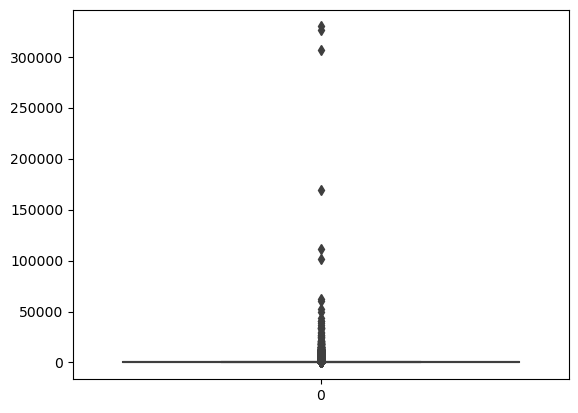

In [848]:
sns.boxplot(df['DebtRatio'])

In [849]:
df[df['DebtRatio']<df['DebtRatio'].quantile(.975)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,140594.000000,1.405940e+05
mean,0.068004,6.498411e+03
std,0.251754,1.329304e+04
min,0.000000,0.000000e+00
25%,0.000000,3.785000e+03
50%,0.000000,5.400000e+03
75%,0.000000,7.600000e+03
max,1.000000,3.008750e+06


In [850]:
## The delinquency is peaking at 0.975 quantile of DebtRatio, hence it's prudent to remove the outliers beyond that point.

In [851]:
df[df['MonthlyIncome']==0][['SeriousDlqin2yrs','DebtRatio']].describe()

,SeriousDlqin2yrs,DebtRatio
count,1601.000000,1601.000000
mean,0.039975,1591.589631
std,0.195962,2797.685119
min,0.000000,0.000000
25%,0.000000,120.000000
50%,0.000000,959.000000
75%,0.000000,2211.000000
max,1.000000,60212.000000


In [852]:
df.shape

(144199, 11)

In [853]:
df[(df['DebtRatio']<df['DebtRatio'].quantile(.975))]['DebtRatio'].describe()

count    140594.000000
mean        196.406717
std         602.109471
min           0.000000
25%           0.171305
50%           0.350274
75%           0.695059
max        3453.000000
Name: DebtRatio, dtype: float64

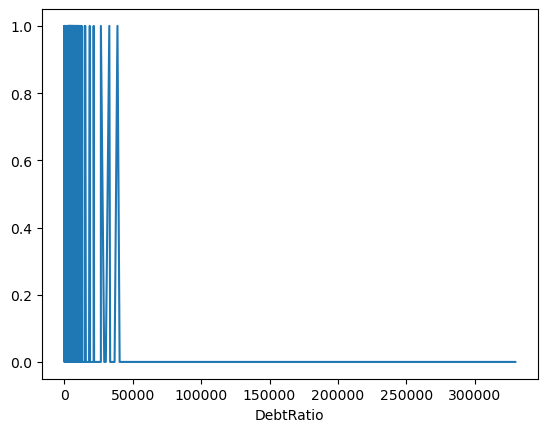

In [854]:
df.groupby('DebtRatio')['SeriousDlqin2yrs'].mean().plot();

In [855]:
df[(df['DebtRatio']<df['DebtRatio'].quantile(.975))]['SeriousDlqin2yrs'].value_counts()

0    131033
1      9561
Name: SeriousDlqin2yrs, dtype: int64

In [856]:
df1=df.drop(df[(df['DebtRatio']>df['DebtRatio'].quantile(.975))].index)

In [857]:
df1.shape

(140594, 11)

In [858]:
df1['SeriousDlqin2yrs'].value_counts()

0    131033
1      9561
Name: SeriousDlqin2yrs, dtype: int64

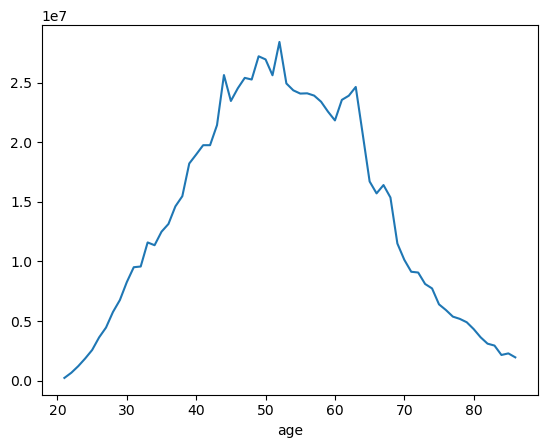

In [859]:
df1.groupby('age')['MonthlyIncome'].sum().plot();

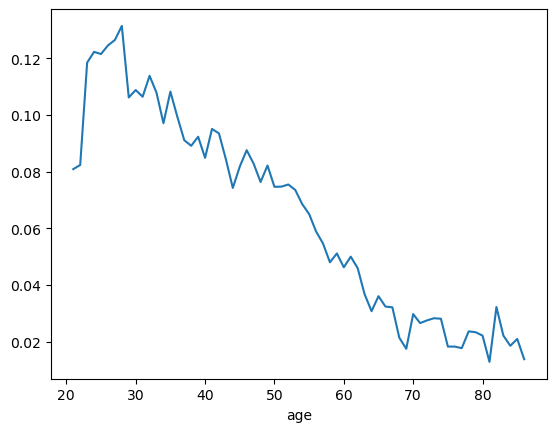

In [860]:
df1.groupby('age')['SeriousDlqin2yrs'].mean().plot();

In [861]:
df1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: xlabel='RevolvingUtilizationOfUnsecuredLines'>

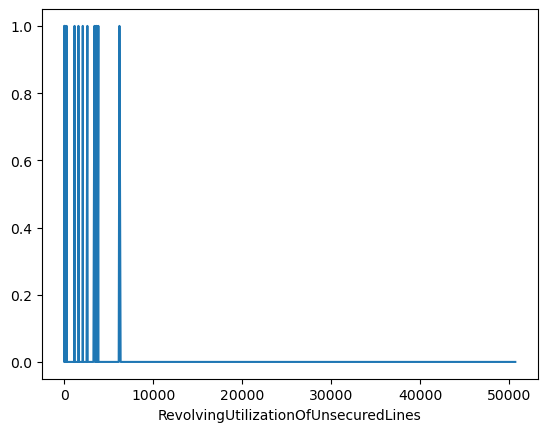

In [862]:
df1.groupby('RevolvingUtilizationOfUnsecuredLines')['SeriousDlqin2yrs'].mean().plot()

In [863]:
df1['RevolvingUtilizationOfUnsecuredLines'].quantile(.999)

1164.7680000001565

In [864]:
df1[(df1['RevolvingUtilizationOfUnsecuredLines']>df1['RevolvingUtilizationOfUnsecuredLines'].quantile(.999))]['RevolvingUtilizationOfUnsecuredLines'].describe()

count      141.000000
mean      5122.226950
std       5946.903074
min       1179.000000
25%       1982.000000
50%       3484.000000
75%       5893.000000
max      50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [865]:
df1[(df1['RevolvingUtilizationOfUnsecuredLines']>df1['RevolvingUtilizationOfUnsecuredLines'].quantile(.999))]['SeriousDlqin2yrs'].mean()

0.05673758865248227

In [866]:
df2=df1.drop(df1[(df1['RevolvingUtilizationOfUnsecuredLines']>df1['RevolvingUtilizationOfUnsecuredLines'].quantile(.999))].index)

In [867]:
df2.shape

(140453, 11)

In [868]:
df2.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.004894,-0.114079,0.130070,-0.025427,-0.018054,-0.035377,0.121395,-0.011284,0.104570,0.046236
RevolvingUtilizationOfUnsecuredLines,0.004894,1.000000,-0.006189,0.001383,-0.001059,0.000526,-0.014826,0.001478,-0.001626,0.001173,-0.002546
age,-0.114079,-0.006189,1.000000,-0.052791,0.048617,0.032654,0.171669,-0.051141,0.056392,-0.046779,-0.207784
NumberOfTime30-59DaysPastDueNotWorse,0.130070,0.001383,-0.052791,1.000000,-0.014654,-0.008742,-0.049423,0.979872,-0.027610,0.984125,-0.000033
DebtRatio,-0.025427,-0.001059,0.048617,-0.014654,1.000000,-0.035981,0.007226,-0.013541,0.060217,-0.012668,-0.094865
MonthlyIncome,-0.018054,0.000526,0.032654,-0.008742,-0.035981,1.000000,0.089613,-0.011137,0.123458,-0.009700,0.065234
NumberOfOpenCreditLinesAndLoans,-0.035377,-0.014826,0.171669,-0.049423,0.007226,0.089613,1.000000,-0.076154,0.426312,-0.065921,0.064022
NumberOfTimes90DaysLate,0.121395,0.001478,-0.051141,0.979872,-0.013541,-0.011137,-0.076154,1.000000,-0.043222,0.991027,-0.007950
NumberRealEstateLoansOrLines,-0.011284,-0.001626,0.056392,-0.027610,0.060217,0.123458,0.426312,-0.043222,1.000000,-0.036955,0.131667
NumberOfTime60-89DaysPastDueNotWorse,0.104570,0.001173,-0.046779,0.984125,-0.012668,-0.009700,-0.065921,0.991027,-0.036955,1.000000,-0.008738


## Variance Inflation Testing 

In [869]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [870]:
X=df2.drop('SeriousDlqin2yrs',axis=1)

In [871]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                feature        VIF
0  RevolvingUtilizationOfUnsecuredLines   1.001556
1                                   age   3.904627
2  NumberOfTime30-59DaysPastDueNotWorse  33.733835
3                             DebtRatio   1.120813
4                         MonthlyIncome   1.263582
5       NumberOfOpenCreditLinesAndLoans   4.648456
6               NumberOfTimes90DaysLate  58.840202
7          NumberRealEstateLoansOrLines   2.298668
8  NumberOfTime60-89DaysPastDueNotWorse  73.583496
9                    NumberOfDependents   1.431548


In [872]:
df_v=df2.drop(['NumberOfTimes90DaysLate',
             'NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
df_v.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,6,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,1,0.0


In [873]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_v.columns
vif_data["VIF"] = [variance_inflation_factor(df_v.values, i)
                          for i in range(len(df_v.columns))]
  
print(vif_data)

                                feature       VIF
0                      SeriousDlqin2yrs  1.080433
1  RevolvingUtilizationOfUnsecuredLines  1.001590
2                                   age  3.907788
3  NumberOfTime30-59DaysPastDueNotWorse  1.027190
4                             DebtRatio  1.120855
5                         MonthlyIncome  1.263654
6       NumberOfOpenCreditLinesAndLoans  4.581896
7          NumberRealEstateLoansOrLines  2.297629
8                    NumberOfDependents  1.436124


In [874]:
df_v.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

In [875]:
df_v.shape

(140453, 9)

## Building various Classification Models 

In [876]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [877]:
X=df_v.drop('SeriousDlqin2yrs',axis=1)
Y=df_v['SeriousDlqin2yrs']

In [878]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,stratify=df_v[['SeriousDlqin2yrs']],
                             random_state=42)


In [879]:

    
clf = LogisticRegression(penalty='l2',random_state=42).fit(X_train, y_train)



/Users/ankitshastri/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [880]:
X_train.shape

(112362, 8)

In [881]:
y_train.shape

(112362,)

In [882]:
X_test.shape

(28091, 8)

In [883]:
y_test.shape

(28091,)

In [884]:

y_pred=clf.predict(X_test)
   
y_pred.shape

(28091,)

In [885]:
scores=[]
scores.append(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

In [886]:
print('Accuracy: ',scores)
print('Confusion Matrix: ',cm)

Accuracy:  [0.9325762699797088]
Confusion Matrix:  [[26169    11]
 [ 1883    28]]


Text(50.722222222222214, 0.5, 'actuals')

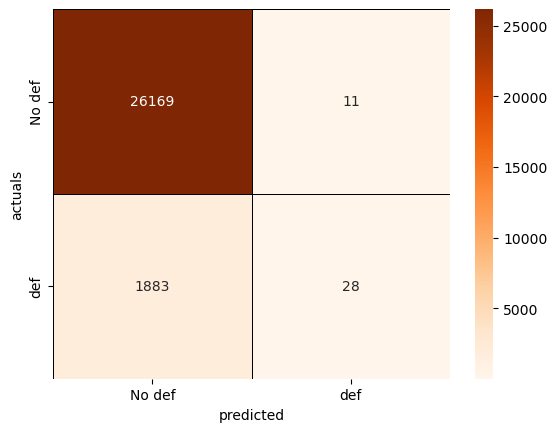

In [887]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [888]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     26180
           1       0.72      0.01      0.03      1911

    accuracy                           0.93     28091
   macro avg       0.83      0.51      0.50     28091
weighted avg       0.92      0.93      0.90     28091



In [889]:
rf=RandomForestClassifier(n_estimators=7,random_state=42).fit(X_train, y_train)


In [890]:
y_pred=rf.predict(X_test)


In [904]:
rf.feature_names_in_

array(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines', 'NumberOfDependents'], dtype=object)

In [903]:
rf.feature_importances_

array([0.23346841, 0.14337917, 0.08159914, 0.19767796, 0.17121685,
       0.09764817, 0.03296985, 0.04204045])

In [891]:
scores=[]
scores.append(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',scores)
print('Confusion Matrix: ',cm)

Accuracy:  [0.9267025025808978]
Confusion Matrix:  [[25792   388]
 [ 1671   240]]


Text(50.722222222222214, 0.5, 'actuals')

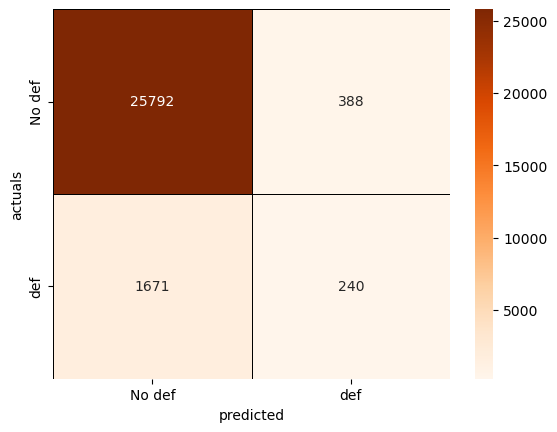

In [892]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [893]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26180
           1       0.38      0.13      0.19      1911

    accuracy                           0.93     28091
   macro avg       0.66      0.56      0.58     28091
weighted avg       0.90      0.93      0.91     28091



In [894]:
!pip3 install xgboost

In [895]:
import xgboost as xgb
from xgboost import XGBClassifier

In [896]:
model = XGBClassifier(tree_method = 'exact')

In [897]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [898]:
y_pred=model.predict(X_test)

In [899]:
scores=[]
scores.append(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',scores)
print('Confusion Matrix: ',cm)

Accuracy:  [0.9320778897155673]
Confusion Matrix:  [[25998   182]
 [ 1726   185]]


Text(50.722222222222214, 0.5, 'actuals')

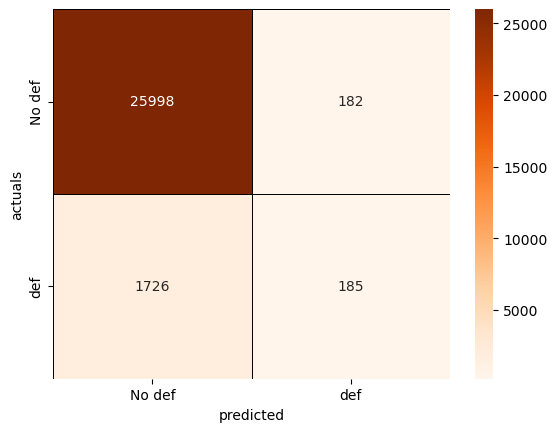

In [900]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [901]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     26180
           1       0.50      0.10      0.16      1911

    accuracy                           0.93     28091
   macro avg       0.72      0.54      0.56     28091
weighted avg       0.91      0.93      0.91     28091

